# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

610


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


# Set up lists to hold response info
name_info = []
cloud_info = []
country_info = []
date_info = []
humidity_info = []
lat_info = []
lon_info = []   
temp_max = []
wind_speed = []

# Start the counters
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 1 # counter to count the number of call sets

#Get current time
t0 = time.time()

#Log file print statement
print(f"Beginning Data Retrieval \n------------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try: 
        weather_response = requests.get(query_url + city)
        name_info.append(weather_response.json()['name'])
        cloud_info.append(weather_response.json()['clouds']['all'])
        country_info.append(weather_response.json()['sys']['country'])
        date_info.append(weather_response.json()['dt'])
        humidity_info.append(weather_response.json()['main']['humidity'])
        lat_info.append(weather_response.json()['coord']['lat'])
        lon_info.append(weather_response.json()['coord']['lon'])
        temp_max.append(weather_response.json()['main']['temp_max'])
        wind_speed.append(weather_response.json()['wind']['speed'])
        city_record = weather_response.json()['name']
    
        # Print call log counter
        print(f"Processing Record {count} of Set {sets} | {city_record}")
    
    # If no record found, skip to the next API call      
    except KeyError:
        print("City not found. Skipping...")
        err= err+1
    # Increase counter by one
    count = count + 1  
    if count == 51: # loop to limit 50 API calls per minute. The API is capped at 60 per min.
        print("Resting...")
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0 = time.time()
        
print("Last Call")
print(f'{err} cities returned KeyErrors and were skipped')
        



Beginning Data Retrieval 
------------------------------------
Processing Record 1 of Set 1 | Souillac
Processing Record 2 of Set 1 | Aksarka
Processing Record 3 of Set 1 | Hermanus
Processing Record 4 of Set 1 | Kununurra
Processing Record 5 of Set 1 | Ushuaia
Processing Record 6 of Set 1 | Punta Arenas
Processing Record 7 of Set 1 | Taga
Processing Record 8 of Set 1 | Avarua
Processing Record 9 of Set 1 | Qaanaaq
Processing Record 10 of Set 1 | Mataura
Processing Record 11 of Set 1 | Geraldton
Processing Record 12 of Set 1 | Tuktoyaktuk
Processing Record 13 of Set 1 | Kodinsk
Processing Record 14 of Set 1 | Tilichiki
Processing Record 15 of Set 1 | Cidreira
City not found. Skipping...
Processing Record 17 of Set 1 | Angoche
Processing Record 18 of Set 1 | Clyde River
City not found. Skipping...
Processing Record 20 of Set 1 | Kruisfontein
City not found. Skipping...
Processing Record 22 of Set 1 | Lata
Processing Record 23 of Set 1 | Chapais
Processing Record 24 of Set 1 | Kampot
Pro

City not found. Skipping...
Processing Record 5 of Set 5 | Kasane
City not found. Skipping...
Processing Record 7 of Set 5 | Lasa
Processing Record 8 of Set 5 | Turbat
Processing Record 9 of Set 5 | Durusu
Processing Record 10 of Set 5 | Albion
City not found. Skipping...
Processing Record 12 of Set 5 | Bathsheba
Processing Record 13 of Set 5 | Quelimane
Processing Record 14 of Set 5 | Avera
Processing Record 15 of Set 5 | Puerto Escondido
Processing Record 16 of Set 5 | Lagoa
Processing Record 17 of Set 5 | Antropovo
Processing Record 18 of Set 5 | Majene
Processing Record 19 of Set 5 | Ambanja
Processing Record 20 of Set 5 | Aklavik
Processing Record 21 of Set 5 | Sinnamary
Processing Record 22 of Set 5 | Brownsville
Processing Record 23 of Set 5 | Huai Yot
Processing Record 24 of Set 5 | Maun
Processing Record 25 of Set 5 | Ribeira Grande
City not found. Skipping...
Processing Record 27 of Set 5 | Kuusamo
Processing Record 28 of Set 5 | Saint-Louis
City not found. Skipping...
Proces

Processing Record 12 of Set 9 | Dingle
Processing Record 13 of Set 9 | Yulara
Processing Record 14 of Set 9 | Evensk
Processing Record 15 of Set 9 | High Level
Processing Record 16 of Set 9 | Vila Franca do Campo
Processing Record 17 of Set 9 | Grenville
Processing Record 18 of Set 9 | Palmerston
Processing Record 19 of Set 9 | Mount Isa
Processing Record 20 of Set 9 | Zabol
Processing Record 21 of Set 9 | Westport
Processing Record 22 of Set 9 | Xiaoweizhai
Processing Record 23 of Set 9 | Dongsheng
Processing Record 24 of Set 9 | Lichtenburg
Processing Record 25 of Set 9 | Kahului
Processing Record 26 of Set 9 | Dikson
Processing Record 27 of Set 9 | Las Vegas
Processing Record 28 of Set 9 | Maryborough
Processing Record 29 of Set 9 | Pangody
Processing Record 30 of Set 9 | Kalamare
Processing Record 31 of Set 9 | Sabha
Processing Record 32 of Set 9 | Andreapol
Processing Record 33 of Set 9 | Tautira
Processing Record 34 of Set 9 | Acapulco
Processing Record 35 of Set 9 | Mpulungu
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    
    "City" : name_info,
    "Cloudiness" : cloud_info,
    "Country" : country_info,
    "Date" : date_info,
    "Humidity" : humidity_info,
    "Latitude" : lat_info,
    "Longitude" : lon_info,
    "Temperature Max" : temp_max,
    "Wind Speed" : wind_speed,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               545
Cloudiness         545
Country            545
Date               545
Humidity           545
Latitude           545
Longitude          545
Temperature Max    545
Wind Speed         545
dtype: int64

In [5]:
# Export the city data into a .csv
weather_data.to_csv('output_data/weather_data.csv')

#Display the DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature Max,Wind Speed
0,Souillac,0,FR,1559364358,82,45.60,-0.60,59.00,2.24
1,Aksarka,100,RU,1559364359,80,66.56,67.80,37.13,4.12
2,Hermanus,11,ZA,1559364341,92,-34.42,19.24,54.00,5.79
3,Kununurra,0,AU,1559364359,16,-15.77,128.74,77.00,13.87
4,Ushuaia,90,AR,1559364073,74,-54.81,-68.31,33.80,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

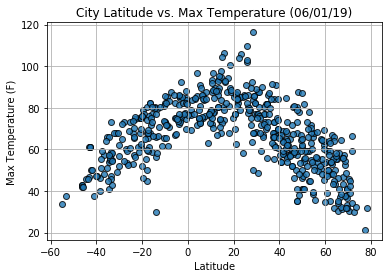

In [6]:
# Build a scatter plot for each data type
plt.scatter(
    weather_data["Latitude"], 
    weather_data["Temperature Max"], 
    marker="o", 
    c='tab:blue',
    edgecolors='black',
    alpha=.8
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (06/01/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

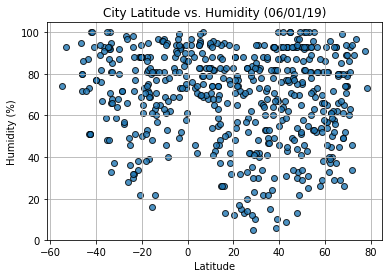

In [7]:
# Build a scatter plot for each data type
plt.scatter(
    weather_data["Latitude"], 
    weather_data["Humidity"], 
    marker="o", 
    c='tab:blue',
    edgecolors='black',
    alpha=.8,
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (06/01/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

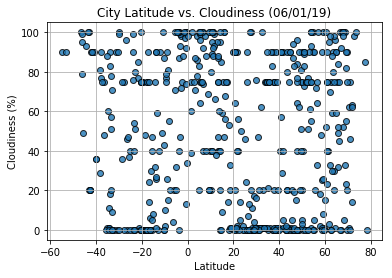

In [8]:
# Build a scatter plot for each data type
plt.scatter(
    weather_data["Latitude"], 
    weather_data["Cloudiness"], 
    marker="o", 
    c='tab:blue',
    edgecolors='black',
    alpha=.8,
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (06/01/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

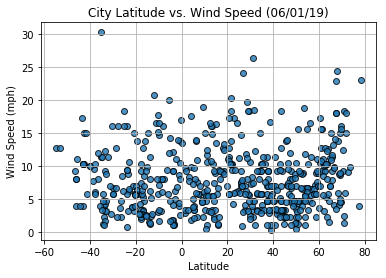

In [9]:
# Build a scatter plot for each data type
plt.scatter(
    weather_data["Latitude"], 
    weather_data["Wind Speed"], 
    marker="o", 
    c='tab:blue',
    edgecolors='black',
    alpha=.8,
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (06/01/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsWindSpeed.png")

# Show plot
plt.show()